In [5]:
from bs4 import BeautifulSoup
import requests
from csv import writer
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [2]:
#   THIS CELL SCRAPES THE DATA FROM AUTOTRADER, 1500 PAGES TAKE ~13 MINUTES RUN TIME, UNCOMMENT TO UPDATE THE CSV


# with open('cars.csv', 'w', encoding='utf8', newline='') as f:
#     thewriter = writer(f)
#     header = ['Name', 'Location', 'Price','Monthly Payment', 'Milage (KM)','Ownership','Transmission']
#     thewriter.writerow(header)
#     for pagenum in range(1,1500):

#         url= "https://www.autotrader.co.za/cars-for-sale/gauteng/johannesburg/parktown/s-4390?pagenumber="+ str(pagenum)+"&radius=50&priceoption=RetailPrice"
#         page = requests.get(url)
#         soup = BeautifulSoup(page.content, 'html.parser')
#         lists = soup.find_all('span', class_="e-details")
#         for list in lists:
#             #total price
#             price = list.find('span', class_="e-price")
#             if price is not None:
#                 price=price.text
#             #name of car
#             name = list.find('span', class_="e-title")
#             if name is not None:
#                 name=name.text
#             #monthly installments
#             monthlyPayment = list.find('span', class_="e-estimated-payment")
#             if monthlyPayment is not None:
#                 monthlyPayment=monthlyPayment.text
#             #location
#             location = list.find('span', class_="e-suburb")
#             if location is not None:
#                 location=location.text
            
#             if len(list.find_all('li', class_="e-summary-icon"))==3:
#                 preOwned = list.find_all('li', class_="e-summary-icon")[0]
#                 if preOwned is not None:
#                     preOwned=preOwned.text
                
#                 milage = list.find_all('li', class_="e-summary-icon")[1]
#                 if milage is not None:
#                     milage=milage.text
                
#                 transmission = list.find_all('li', class_="e-summary-icon")[2]
#                 if transmission is not None:
#                     transmission=transmission.text

#             #extract the link so you can click on the car you like
                    
#             info =[name,location,price,monthlyPayment,milage,preOwned,transmission]
#             thewriter.writerow(info)

In [6]:
def extractYear(fullname):
    return int(fullname.split(" ")[0])
def extractMake(fullname):
    return fullname.split(" ")[1]
def extractModel(fullname):
    return fullname.split(" ")[2]
def removeNoneDigit(fullname):
    return int(re.sub('[^0-9]','', fullname))
def extractSuburb(fullname):
    return fullname.split(",")[0]
def extractCity(fullname):
    return fullname.split(",")[1]


In [7]:
carcsv=pd.read_csv('cars.csv')
carcsv=carcsv.dropna(axis = 0, subset=['Name','Location','Price','Monthly Payment','Milage (KM)'])
carcsv['Year']=carcsv['Name'].apply(extractYear)
carcsv['Age']=datetime.datetime.now().year - carcsv['Year']

carcsv['Make']=carcsv['Name'].apply(extractMake)

carcsv['City']=carcsv['Location'].apply(extractCity)
carcsv['Suburb']=carcsv['Location'].apply(extractSuburb)
carcsv['Model']=carcsv['Name'].apply(extractModel)
carcsv['Milage (KM)']=carcsv['Milage (KM)'].apply(removeNoneDigit)
carcsv['Price']=carcsv['Price'].apply(removeNoneDigit)
carcsv['Monthly Payment']=carcsv['Monthly Payment'].apply(removeNoneDigit)
carcsv['Total Repayment']=carcsv['Monthly Payment']*72
carcsv.reset_index(drop=True, inplace=True)
carcsv

,Name,Location,Price,Monthly Payment,Milage (KM),Ownership,Transmission,Year,Age,Make,City,Suburb,Model,Total Repayment
0,2022 Rolls-Royce Cullinan Black Badge,"Morningside, Sandton",15999995,304545,100,Used Car,Automatic,2022,0,Rolls-Royce,Sandton,Morningside,Cullinan,21927240
1,2022 Ferrari SF90 Stradale,"Benoni Industrial, Benoni",13999999,266477,300,Used Car,Automatic,2022,0,Ferrari,Benoni,Benoni Industrial,SF90,19186344
2,2022 Rolls-Royce Ghost Black Badge,"Melrose North, Johannesburg",13800000,262670,100,Used Car,Automatic,2022,0,Rolls-Royce,Johannesburg,Melrose North,Ghost,18912240
3,2022 Rolls-Royce Ghost Ghost,"Melrose North, Johannesburg",12500000,237926,100,Used Car,Automatic,2022,0,Rolls-Royce,Johannesburg,Melrose North,Ghost,17130672
4,2021 Ferrari 812 GTS,"Morningside, Sandton",10999995,209375,3000,Used Car,Automatic,2021,1,Ferrari,Sandton,Morningside,812,15075000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29874,2015 Hyundai Accent Hatch 1.6 Fluid,"Savoy Estate, Johannesburg",136955,2607,97000,Used Car,Manual,2015,7,Hyundai,Johannesburg,Savoy Estate,Accent,187704
29875,2005 BMW Z4 3.0i Auto,"Magaliessig, Sandton",136900,2606,167043,Used Car,Automatic,2005,17,BMW,Sandton,Magaliessig,Z4,187632
29876,2017 Volkswagen Polo Vivo HATCH 1.4 CONCEPTLINE,"Bryanston, Sandton",136800,2604,132324,Used Car,Manual,2017,5,Volkswagen,Sandton,Bryanston,Polo,187488
29877,2017 Volkswagen Polo Vivo Hatch 1.4 CiTi Vivo,"Savoy Estate, Johannesburg",136660,2601,74245,Used Car,Manual,2017,5,Volkswagen,Johannesburg,Savoy Estate,Polo,187272


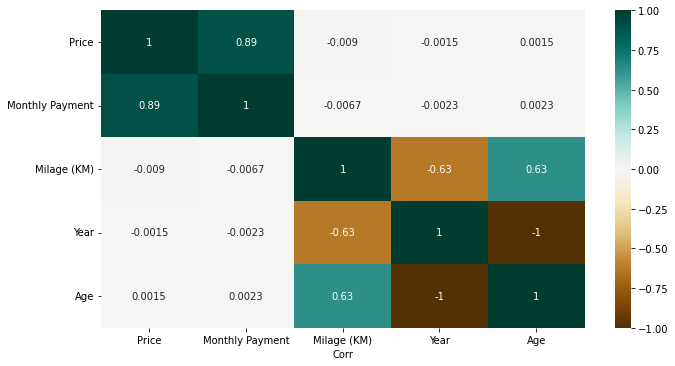

In [6]:
figure = plt.figure(figsize=(10, 5))
sns.heatmap(carcsv.corr(), annot=True,cmap='BrBG')
plt.tight_layout()
plt.xlabel('Corr')
plt.show()

In [7]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [8]:
carcsv=remove_outlier(carcsv,'Price')
carcsv

,Name,Location,Price,Monthly Payment,Milage (KM),Ownership,Transmission,Year,Age,Make,City,Suburb,Model
1848,2019 BMW X5 xDrive30d M Sport,"Cresta, Randburg",1040000,19795,88000,Used Car,Automatic,2019,3,BMW,Randburg,Cresta,X5
1849,2022 Ford Ranger 2.0Bi-Turbo Double Cab 4x4 Ra...,"Bedfordview, Bedfordview",1040000,19795,3721,Used Car,Automatic,2022,0,Ford,Bedfordview,Bedfordview,Ranger
1850,2022 Lexus RX 350 EX,"Magaliessig, Sandton",1039900,19794,12000,Used Car,Automatic,2022,0,Lexus,Sandton,Magaliessig,RX
1851,2022 Ford Mustang 5.0 GT Fastback,"Witkoppen, Sandton",1039900,19794,12000,Used Car,Automatic,2022,0,Ford,Sandton,Witkoppen,Mustang
1852,2021 BMW 5 Series 530i M Sport,"Bryanston, Sandton",1039000,19776,19000,Used Car,Automatic,2021,1,BMW,Sandton,Bryanston,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29874,2015 Hyundai Accent Hatch 1.6 Fluid,"Savoy Estate, Johannesburg",136955,2607,97000,Used Car,Manual,2015,7,Hyundai,Johannesburg,Savoy Estate,Accent
29875,2005 BMW Z4 3.0i Auto,"Magaliessig, Sandton",136900,2606,167043,Used Car,Automatic,2005,17,BMW,Sandton,Magaliessig,Z4
29876,2017 Volkswagen Polo Vivo HATCH 1.4 CONCEPTLINE,"Bryanston, Sandton",136800,2604,132324,Used Car,Manual,2017,5,Volkswagen,Sandton,Bryanston,Polo
29877,2017 Volkswagen Polo Vivo Hatch 1.4 CiTi Vivo,"Savoy Estate, Johannesburg",136660,2601,74245,Used Car,Manual,2017,5,Volkswagen,Johannesburg,Savoy Estate,Polo


<AxesSubplot:xlabel='Year', ylabel='Average Price'>

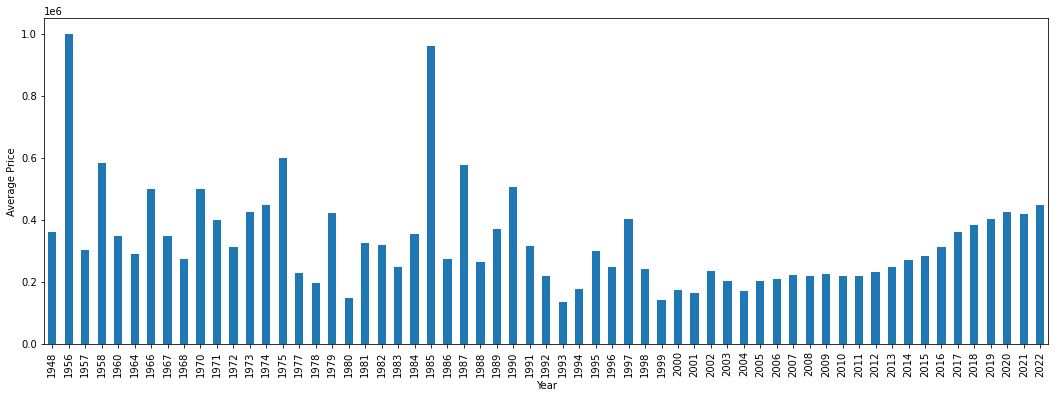

In [20]:
plt.figure(figsize=(18, 6))
plt.ylabel('Average Price')
carcsv.groupby('Year')['Price'].mean().plot.bar()

<AxesSubplot:xlabel='City', ylabel='Price'>

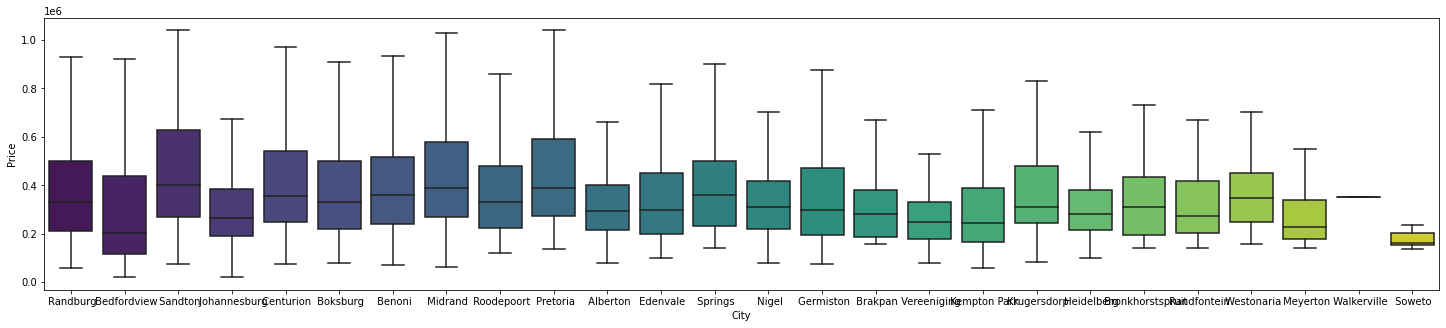

In [22]:
plt.figure(figsize=(25, 5))
sns.boxplot(x=carcsv['City'],y=carcsv['Price'],showfliers=False, palette="viridis")

<AxesSubplot:xlabel='Transmission', ylabel='Price'>

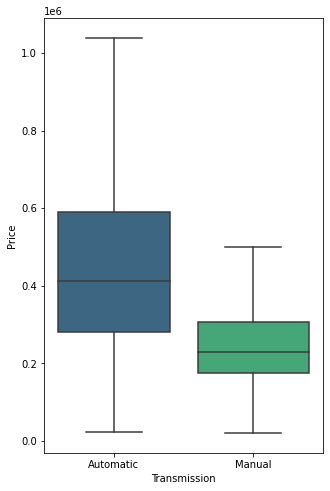

In [23]:
plt.figure(figsize=(5, 8))
sns.boxplot(x=carcsv['Transmission'],y=carcsv['Price'],showfliers=False, palette="viridis")

<AxesSubplot:xlabel='Ownership', ylabel='Price'>

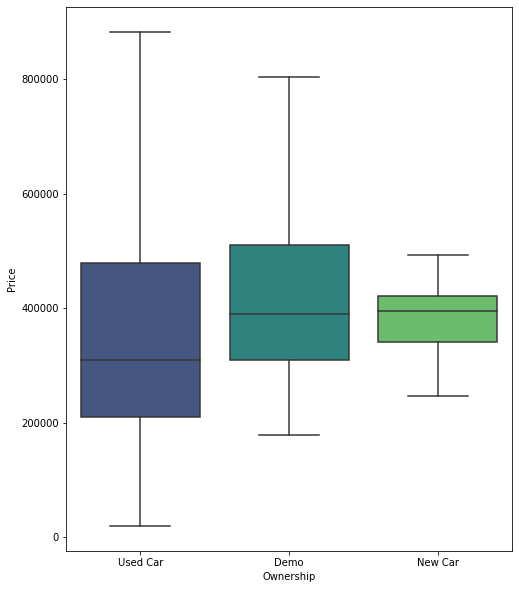

In [13]:
plt.figure(figsize=(8, 10))
# plt.yticks(np.arange(0, carcsv['Price'].max(), 200000))
sns.boxplot(x=carcsv['Ownership'],y=carcsv['Price'],showfliers=False, palette="viridis")


<AxesSubplot:ylabel='Make'>

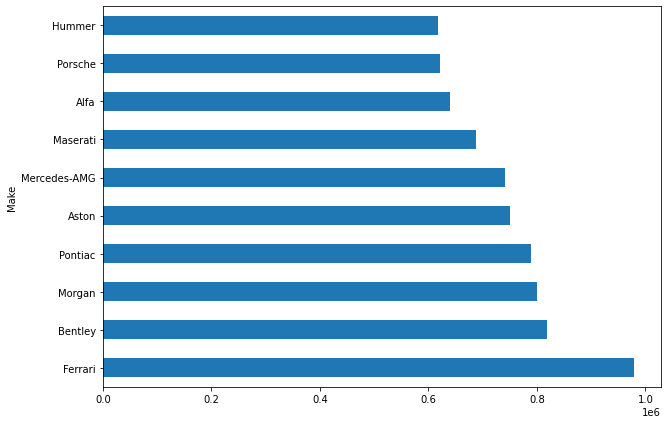

In [14]:
plt.figure(figsize=(10, 7))
carcsv.groupby('Make')['Price'].mean().nlargest(10).plot.barh()

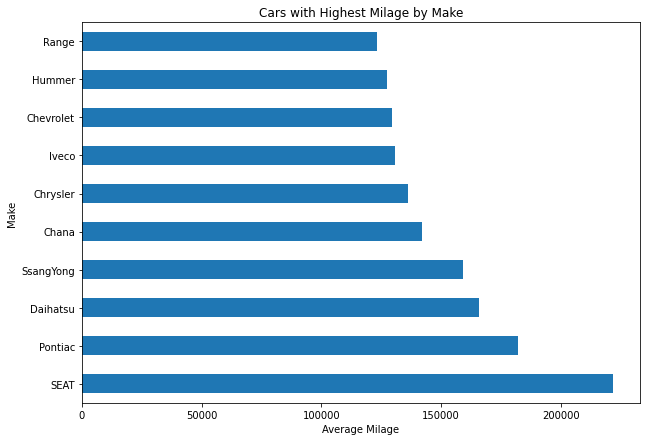

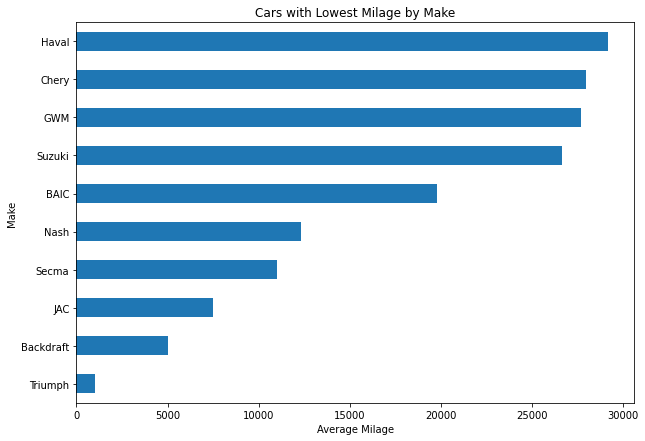

In [15]:
plt.figure(figsize=(10, 7))
plt.title("Cars with Highest Milage by Make")
plt.xlabel('Average Milage')
ax1= carcsv.groupby('Make')['Milage (KM)'].mean().nlargest(10).plot.barh()

plt.figure(figsize=(10, 7))
plt.title("Cars with Lowest Milage by Make")
plt.xlabel('Average Milage')
ax2= carcsv.groupby('Make')['Milage (KM)'].mean().nsmallest(10).plot.barh()

<AxesSubplot:xlabel='Make', ylabel='Milage (KM)'>

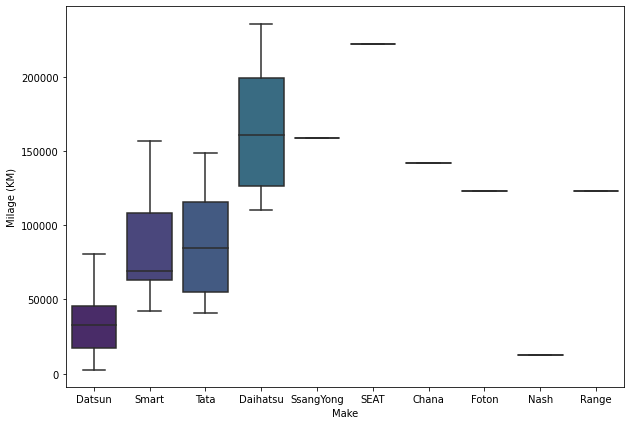

In [16]:
cheapestCars=carcsv.groupby('Make')['Price'].mean().nsmallest(10).keys().tolist()
#put a min on the counts of the car to prevent lines of box plot
plt.figure(figsize=(10, 7))
sns.boxplot(x=carcsv[carcsv['Make'].isin(cheapestCars)]['Make'],y=carcsv['Milage (KM)'],showfliers=False, palette="viridis")

<AxesSubplot:xlabel='Make', ylabel='Milage (KM)'>

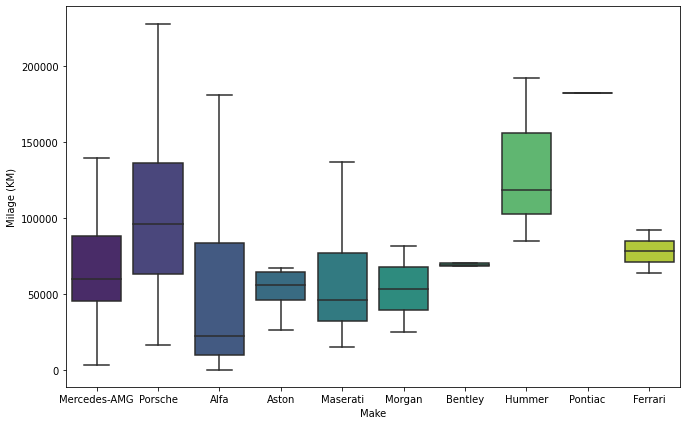

In [17]:
expensiveCars=carcsv.groupby('Make')['Price'].mean().nlargest(10).keys().tolist()
plt.figure(figsize=(11, 7))
sns.boxplot(x=carcsv[carcsv['Make'].isin(expensiveCars)]['Make'],y=carcsv['Milage (KM)'],showfliers=False, palette="viridis")

<AxesSubplot:xlabel='Counts'>

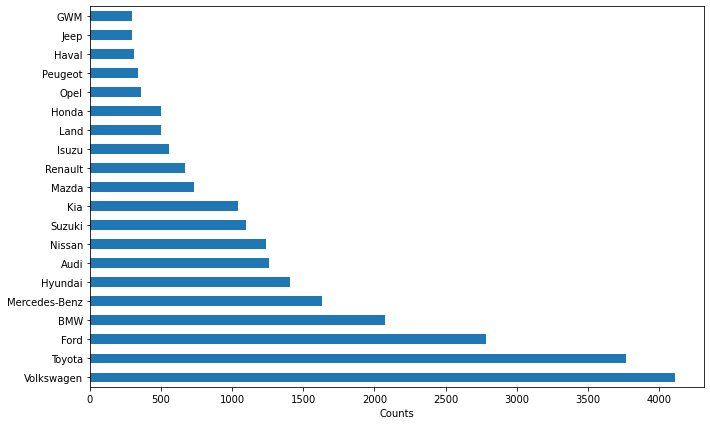

In [41]:
plt.figure(figsize=(11, 7))
plt.xlabel('Counts')
abundantCars=carcsv['Make'].value_counts().nlargest (20).keys()
carcsv['Make'].value_counts().nlargest(20).plot(kind='barh')

<AxesSubplot:xlabel='Counts'>

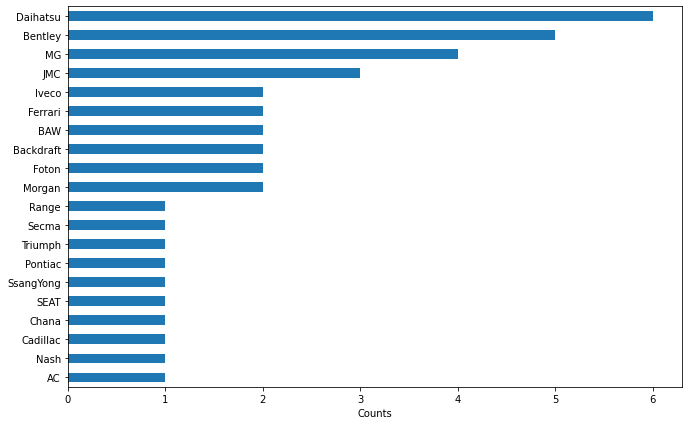

In [45]:
plt.figure(figsize=(11, 7))
plt.xlabel('Counts')
rarestCars=carcsv['Make'].value_counts().nsmallest(20).keys()
carcsv['Make'].value_counts().nsmallest(20).plot(kind='barh')

Index(['AC', 'Nash', 'Cadillac', 'Chana', 'SEAT', 'SsangYong', 'Pontiac',
       'Triumph', 'Secma', 'Range', 'Morgan', 'Foton', 'Backdraft', 'BAW',
       'Ferrari', 'Iveco', 'JMC', 'MG', 'Bentley', 'Daihatsu'],
      dtype='object')